# Appendix F — Calculus tutorial

TODO: import integrals sections from caluclus_tutorial.ipynb

The math concept of the integral of the function $f(x)$ between $x=a$ and $x=b$ is denoted $\int_{x=a}^{x=b} f(x) dx$. 
We need to compute integrals every time we want to \"add up\" the total amount of $f(x)$ between the endpoints $x=a$ and $x=b$.
The code equivalent for this integral is written `quad(f,a,b)`, where `quad` is a function defined in `scipy.integrate`.
In other words, if you learn a bit of Python, you can skip two years of university-level calculus courses (CALC 101 derivatives and CALC 102 integrals)."

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt

# def elliptic_paraboloid(zmax=5, n=200):
#     # Choose x,y limits so that the rim is near z = zmax
#     a = 3 * np.sqrt(zmax)
#     b = 2 * np.sqrt(zmax)

#     x = np.linspace(-a, a, n)
#     y = np.linspace(-b, b, n)
#     X, Y = np.meshgrid(x, y)

#     Z = X**2 / 9 + Y**2 / 4
#     Z = np.ma.masked_where(Z > zmax, Z)
#     return X, Y, Z, a, b

# X, Y, Z, a, b = elliptic_paraboloid(zmax=4, n=200)

# fig = plt.figure(figsize=(6, 5))
# ax = fig.add_subplot(111, projection="3d")

# surf = ax.plot_surface(
#     X, Y, Z,
#     rstride=2, cstride=2,
#     linewidth=0.2, antialiased=True,
#     cmap="Greys"
# )

# # Draw coordinate axes through the origin
# # --- axes as true 3D lines (with low zorder so surface hides them) ---
# ax.plot3D([-a, a], [0, 0], [0, 0], color='black', linewidth=2, zorder=1)   # x-axis
# ax.plot3D([0, 0], [-b, b], [0, 0], color='black', linewidth=2, zorder=1)   # y-axis
# ax.plot3D([0, 0], [0, 0], [0, 5], color='black', linewidth=2, zorder=1)    # z-axis

# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.set_zlabel("z")
# ax.set_zlim(0, 5)

# # Flatter aspect ratio: vertical axis compressed relative to x,y
# ax.set_box_aspect((a, b, 2))   # previously (a, b, 5)

# ax.view_init(elev=25, azim=-60)
# fig.colorbar(surf, shrink=0.6, aspect=12, label="z")

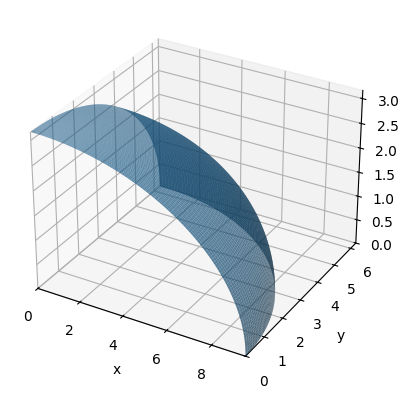

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Ellipsoid parameters
A2, B2, C2 = 9, 4, 1        # denominators for x^2/A2 + y^2/B2 + z^2/C2 = 10
R2 = 10

# Parameter grid on first-octant sphere (u: polar, v: azimuth)
u = np.linspace(0, np.pi/2, 100)
v = np.linspace(0, np.pi/2, 100)
u, v = np.meshgrid(u, v)

# Parametric equations
x = np.sqrt(A2 * R2) * np.sin(u) * np.cos(v)
y = np.sqrt(B2 * R2) * np.sin(u) * np.sin(v)
z = np.sqrt(C2 * R2) * np.cos(u)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, rstride=1, cstride=1, alpha=0.7, linewidth=0)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xlim(0, np.sqrt(A2*R2))
ax.set_ylim(0, np.sqrt(B2*R2))
ax.set_zlim(0, np.sqrt(C2*R2));


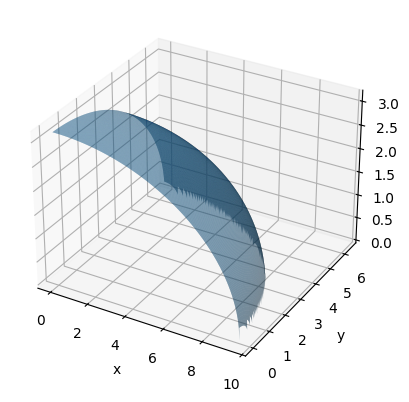

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Domain for x,y in first octant
xmax = np.sqrt(9 * 10)   # = 3*sqrt(10)
ymax = np.sqrt(4 * 10)   # = 2*sqrt(10)

x = np.linspace(0, xmax, 300)
y = np.linspace(0, ymax, 300)
X, Y = np.meshgrid(x, y)

# z(x,y) from ellipsoid equation
Z2 = 10 - (X**2)/9 - (Y**2)/4
Z = np.sqrt(np.maximum(Z2, 0))
Z = np.ma.masked_where(Z2 < 0, Z)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.7, linewidth=0)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

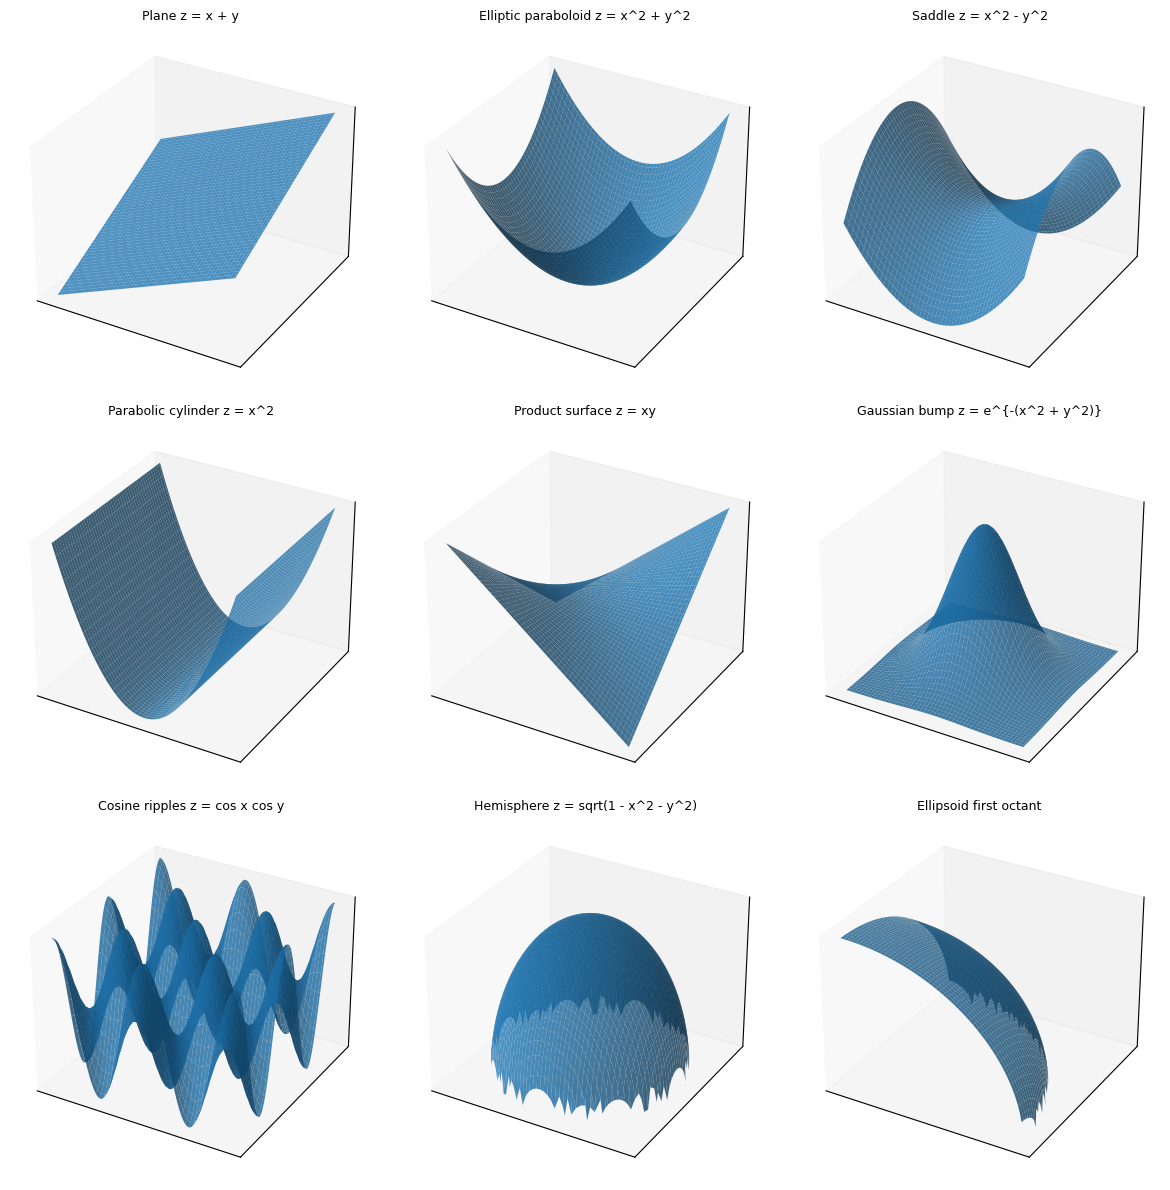

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def ellipsoid_first_octant(n=100):
    xmax = np.sqrt(9 * 10)
    ymax = np.sqrt(4 * 10)
    x = np.linspace(0, xmax, n)
    y = np.linspace(0, ymax, n)
    X, Y = np.meshgrid(x, y)
    Z2 = 10 - (X**2)/9 - (Y**2)/4
    Z = np.sqrt(np.maximum(Z2, 0))
    Z = np.ma.masked_where(Z2 <= 0, Z)
    return X, Y, Z

def surface_from_function(f, xlim, ylim, n=100):
    x = np.linspace(xlim[0], xlim[1], n)
    y = np.linspace(ylim[0], ylim[1], n)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    return X, Y, Z

fig, axes = plt.subplots(
    3, 3,
    subplot_kw={"projection": "3d"},
    figsize=(12, 12)
)

surfaces = [
    ("Plane z = x + y",
     lambda X, Y: X + Y,
     (-2, 2), (-2, 2)),

    ("Elliptic paraboloid z = x^2 + y^2",
     lambda X, Y: X**2 + Y**2,
     (-2, 2), (-2, 2)),

    ("Saddle z = x^2 - y^2",
     lambda X, Y: X**2 - Y**2,
     (-2, 2), (-2, 2)),

    ("Parabolic cylinder z = x^2",
     lambda X, Y: X**2,
     (-2, 2), (-2, 2)),

    ("Product surface z = xy",
     lambda X, Y: X * Y,
     (-2, 2), (-2, 2)),

    ("Gaussian bump z = e^{-(x^2 + y^2)}",
     lambda X, Y: np.exp(-(X**2 + Y**2)),
     (-2, 2), (-2, 2)),

    ("Cosine ripples z = cos x cos y",
     lambda X, Y: np.cos(X) * np.cos(Y),
     (-2 * np.pi, 2 * np.pi), (-2 * np.pi, 2 * np.pi)),

    ("Hemisphere z = sqrt(1 - x^2 - y^2)",
     lambda X, Y: np.ma.masked_where(
         X**2 + Y**2 > 1, np.sqrt(np.maximum(1 - X**2 - Y**2, 0))
     ),
     (-1, 1), (-1, 1)),

    ("Ellipsoid first octant",
     None,  # handled separately
     None, None),
]

for ax, (title, f, xlim, ylim) in zip(axes.ravel(), surfaces):
    if f is None:  # ellipsoid
        X, Y, Z = ellipsoid_first_octant(n=100)
    else:
        X, Y, Z = surface_from_function(f, xlim, ylim, n=100)

    ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0, alpha=0.8)
    ax.set_title(title, fontsize=9)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

plt.tight_layout()